# Lecture 11

## Feature Engineering <a class="anchor" id="TOC"></a>

### [Part I](#part1): World-Management Survey Data 
                                                               
  - Creating new variable(s) from multiple           
       already existing (mean of multiple variable)  
  - Grouping a categorical variable:                 
       countries to continents                       
  - Ordered variables:                               
     - creating an ordered factor                    
         from character or integer                   
     - creating an ordered                           
         from numeric                                
  - Factors or dummy variables:                      
       creating multiple dummies                     
  - Extra: intro to principal component analysis     
                                                     
                                                     
### [PART II](#part2): Bisnode Data                                   
                                                     

- imputing:                                     
    - A: replacing with mean or median            
    - B: outside knowledge to replace values      
    - C: introduce new value:                     
        - only for categorical values           
- log transformation adjustment:                
        log(0) is -Inf -> adjust numerically        
- create dummy variable(s) with                 
        multiple statements: using lead() function  
- randomizing large data for visualization      
- growth rate with log difference:
    - using lag() function                      
- winsorizing                                   

___

Import packages

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

## Part I<a class = 'anchor' id = 'part1'></a>

 World-Management Survey Data
  - Creating new variable(s) from multiple already existing (mean of multiple variable)
  - Grouping a categorical variable: countries to continents
  - Ordered variables:
     - creating an ordered factor variable from character or integer variables
     - creating an ordered variable from numeric
  - Factors or dummy variables: creating multiple dummies

Import World-Management Survey Data

In [2]:
wms  = pd.read_csv("https://osf.io/uzpce/download")

wms.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating a continuous variable out of ordered variables

Trick: lean, perf and talent measures, but multiple variables.\
    1. `filter(regex=)` will select these variables.
    2. calculate average with `mean(axis=1)` for each observation

In [3]:
wms["avg_score"] = wms.filter(regex="lean|perf|talent").mean(axis=1)

In [4]:
wms["avg_score"].describe()

count    14277.000000
mean         2.919203
std          0.670948
min          1.000000
25%          2.444444
50%          2.944444
75%          3.388889
max          5.000000
Name: avg_score, dtype: float64

#### Task:
   create the sum of `aa_` variables \
   check that the resulting variable has value of 1 for each observation as `aa_` variables are dummies for industry code

In [5]:
wms["sum_aa"] = wms.filter(regex="aa_").sum(axis=1)
wms["sum_aa"].describe()

count    14277.000000
mean         0.999930
std          0.008369
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sum_aa, dtype: float64

### Grouping categorical

Creating groups by continents -> reducing dimensionality of a categorical variable


In [6]:
wms["country"].value_counts()

United States          1545
Great Britain          1514
Brazil                 1151
China                  1072
India                   937
France                  764
Germany                 724
Italy                   632
Chile                   611
Greece                  585
Argentina               568
Mexico                  525
Australia               473
Canada                  419
Portugal                410
Singapore               406
Sweden                  404
Poland                  364
Turkey                  332
Spain                   214
Japan                   178
Republic of Ireland     161
New Zealand             151
Northern Ireland        137
Name: country, dtype: int64

In [7]:
wms["country"].value_counts(normalize = True)

United States          0.108216
Great Britain          0.106045
Brazil                 0.080619
China                  0.075086
India                  0.065630
France                 0.053513
Germany                0.050711
Italy                  0.044267
Chile                  0.042796
Greece                 0.040975
Argentina              0.039784
Mexico                 0.036772
Australia              0.033130
Canada                 0.029348
Portugal               0.028718
Singapore              0.028437
Sweden                 0.028297
Poland                 0.025496
Turkey                 0.023254
Spain                  0.014989
Japan                  0.012468
Republic of Ireland    0.011277
New Zealand            0.010576
Northern Ireland       0.009596
Name: country, dtype: float64

`pycountry_convert` module converts country names to country codes and continents

In [8]:
import pycountry_convert as pc

Note: Norther Ireland is not in this database, so convert it by hand. Also, Ireland has to be trimmed.

In [9]:
wms["continent"] = (
    wms["country"]
    .apply(lambda x: np.where(x == "Northern Ireland", "Ireland", x))
    .apply(lambda x: np.where(x == "Republic of Ireland", "Ireland", x))
    .apply(pc.country_name_to_country_alpha2) # converts country name to country code
    .apply(pc.country_alpha2_to_continent_code) # country code to continent code
    .apply(pc.convert_continent_code_to_continent_name)# continent code to name
)

In [10]:
wms["continent"].value_counts(dropna=False)

Europe           5909
Asia             2925
North America    2489
South America    2330
Oceania           624
Name: continent, dtype: int64

 It is also possible to create these groups by hand, with `np.where` command.

In [11]:
wms["ownership"].value_counts(dropna=False)

Dispersed Shareholders            3772
Private Individuals               2885
Founder owned, founder CEO        2427
Family owned, family CEO          2370
Other                              968
Private Equity/Venture Capital     492
Family owned, external CEO         446
Founder owned, external CEO        339
Government                         261
Family owned, CEO unknown          176
Founder owned, CEO unknown         124
NaN                                 17
Name: ownership, dtype: int64

In [12]:
wms["owner"] = np.where(
    wms["ownership"].isnull(),
    np.nan,
    np.where(
        wms["ownership"] == "Government",
        "govt",
        np.where(
            wms["ownership"].str.contains("family", regex=False),
            "family",
            np.where(wms["ownership"] == "Other", "other", "private"),
        ),
    ),
)

In [13]:
wms["owner"].value_counts(dropna=False)

private    10661
family      2370
other        968
govt         261
nan           17
Name: owner, dtype: int64

### Good-to-know: labeled ordered categorical variable: 
labels are ordered, however difference is only in few application

In [14]:
wms["lean1_ord"] = pd.cut(
    wms["lean1"], 5, labels=["extremly poor", "bad", "mediocre", "good", "excellent"]
)

Can easily plot

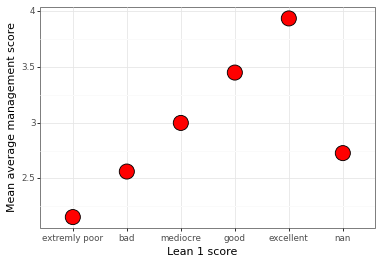

<ggplot: (363255460)>

In [15]:
(
    ggplot(wms, aes(x="lean1_ord", y="avg_score"))
    + stat_summary(geom="point", fun_data="mean_se", size=8, fill="red")
    + labs(x="Lean 1 score", y="Mean average management score")
    + theme_bw()
)

#### Task:
Create the same graph, but using the `talent2` variable instead

In [16]:
wms["talent2_ord"] = pd.cut(
    wms["talent2"], 5, labels=["extremly poor", "bad", "mediocre", "good", "excellent"]
)

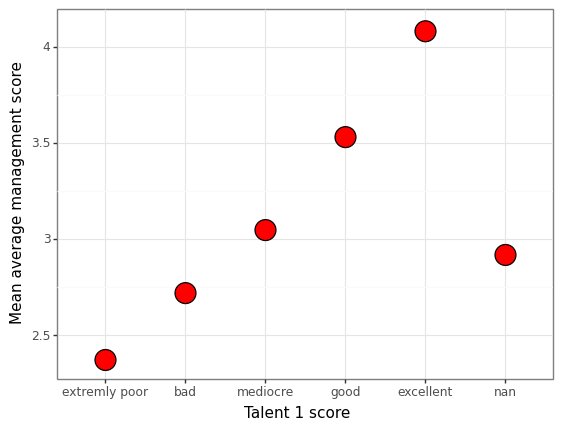

<ggplot: (364027613)>

In [17]:
(
    ggplot(wms, aes(x="talent2_ord", y="avg_score"))
    + stat_summary(geom="point", fun_data="mean_se", size=8, fill="red")
    + labs(x="Talent 1 score", y="Mean average management score")
    + theme_bw()
)

##### Numeric to ordered

It is hard to get any conclusion if we plot the pattern between 
   average management score and number of employees

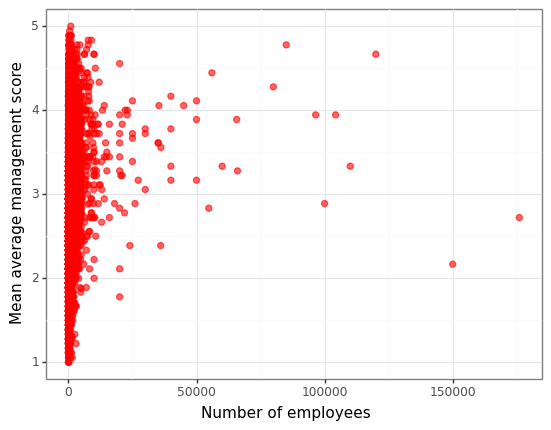

<ggplot: (364066633)>

In [18]:
(
    ggplot(wms, aes(x="emp_firm", y="avg_score"))
    + geom_point(color="red", size=2, alpha=0.6)
    + labs(x="Number of employees", y="Mean average management score")
    + theme_bw()
)

One simple way to solve this issue:\
Simplifying firm size: creating categories from numeric

In [19]:
wms["emp_cat"] = pd.cut(
    wms["emp_firm"], bins=[0, 200, 1000, np.inf], labels=["small", "medium", "large"]
)

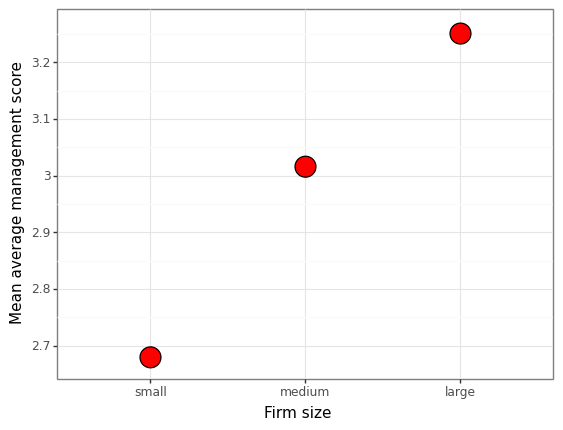

<ggplot: (364135554)>

In [20]:
(
    ggplot(
        wms.loc[
            lambda x: x["emp_cat"].notnull(),
        ],
        aes(x="emp_cat", y="avg_score"),
    )
    + stat_summary(geom="point", fun_data="mean_se", size=8, fill="red", na_rm=True)
    + labs(x="Firm size", y="Mean average management score")
    + theme_bw()
)

### Factors Or Dummies

Creating multiple factor dummy from a categorical

In [21]:
dummies = pd.get_dummies(wms["emp_cat"], dummy_na = True)
dummies

,small,medium,large,NaN
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
14272,1,0,0,0
14273,0,1,0,0
14274,1,0,0,0
14275,0,1,0,0


You can easily concatenate this to the original dataframe

In [22]:
wms = pd.concat([wms,dummies],axis=1)
wms.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,sum_aa,continent,owner,lean1_ord,talent2_ord,emp_cat,small,medium,large,NaN
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,1.0,North America,other,mediocre,good,medium,0,1,0,0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,1.0,North America,private,excellent,bad,medium,0,1,0,0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,1.0,North America,private,bad,mediocre,large,0,0,1,0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,1.0,North America,other,good,excellent,small,1,0,0,0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,1.0,North America,other,excellent,excellent,small,1,0,0,0


### Extra:

principle component analysis or PCA

One can argue, that the mean of the score is not the best measure, as it takes each value with the same weight \
An alternative solution is creating principal components, which transform the original variables.

import PCA function from sklearn

In [23]:
from sklearn.decomposition import PCA

Let us create principle components with all the questionnaires. \
have to make sure there is no NA value

In [24]:
original_variables = wms.filter(regex="lean|perf|talent").filter(regex="^(?!.*ord).*$").dropna()
original_variables.shape

(13653, 18)

fit PCA model

In [25]:
pca = PCA()

pca.fit(original_variables)

PCA()

We have the same number of variables, but they are transformed.

As PCA is an information reductionist approach, we can see, 
     which transformed variable explains what percent of the overall information (variation)

In [26]:
pca.explained_variance_ratio_

array([0.45619448, 0.06927299, 0.05498153, 0.04563192, 0.03942608,
       0.03631061, 0.03557364, 0.03326425, 0.02915193, 0.02883196,
       0.02601336, 0.02466303, 0.02382828, 0.02349845, 0.02207764,
       0.0195712 , 0.01616723, 0.01554141])

Let us decide to use only the first variable, which explains 45.6%

In [27]:
pca_components = pd.DataFrame(
    pca.fit_transform(original_variables),
    columns=["PC%s" % str(i + 1) for i in range(len(original_variables.columns))],
)
pca_components.shape

(13653, 18)

aux: add firmid and wave with same filter to match PCs to wms data

In [28]:
aux = (
    wms.filter(regex="lean|perf|talent|wave|firmid")
    .filter(regex="^(?!.*ord).*$")
    .dropna()
    .filter(["wave", "firmid"])
    .reset_index(drop=True)
)
aux.shape

(13653, 2)

add firmid wave and only PC0 from pca-s

In [29]:
pca_dataframe = pd.concat([aux, pca_components["PC1"]], axis=1)

pca_dataframe.shape

(13653, 3)

add to wms data

In [30]:
wms = wms.merge(pca_dataframe, on = ["firmid","wave"],how="left")

Compare descriptives with average score


In [31]:
wms.filter(["avg_score", "PC1"]).describe()

,avg_score,PC1
count,14904.000000,14310.000000
mean,2.929302,0.044593
std,0.673066,2.897535
min,1.000000,-8.104674
25%,2.500000,-1.914868
50%,2.944444,0.075847
75%,3.388889,2.033661
max,5.000000,8.548531


Create a bin-scatter with PC1

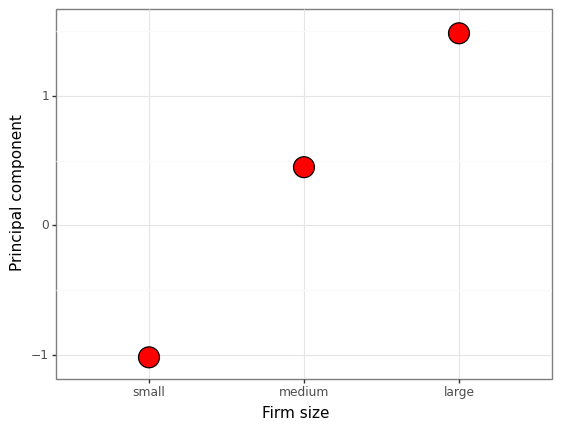

<ggplot: (364263154)>

In [32]:
(
    ggplot(
        wms.loc[
            lambda x: x["emp_cat"].notnull(),
        ],
        aes(x="emp_cat", y="PC1"),
    )
    + stat_summary(geom="point", fun_data="mean_se", size=8, fill="red", na_rm=True)
    + labs(x="Firm size", y="Principal component")
    + theme_bw()
)

Notes: 
  1) PCA is especially useful when you have too many explanatory variables and want to reduce num vars, 
      with minimal information loss. However, should use it with care, especially with time series! \
  2) There are many variations of PCA, if one starts to `rotate` the factors 
      to make some meaningful variables out of it (especially in psychology) \
  3) There are many packages, which carry out PCA, this is pretty much the simplest intro here... \

## Part II<a class = 'anchor' id = 'part2'></a>

Bisnode data to show real-life situations for:
  - imputing: 
      - A: replacing with mean or median
      - B: using outside knowledge to replace values
      - C: introduce new value -> only for categorical values
  - log transformation adjustment: log(0) is -Inf -> adjust numerically
  - create dummy variable(s) with multiple statements: using lead() function
  - randomizing large data for visualization
  - growth rate with log difference: using lag() function
  - winsorizing

Using bisnode data for firm exit

In [33]:
bisnode = pd.read_csv("https://osf.io/3qyut/download")

bisnode.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


Sample selection\
drop variables with many NAs

In [34]:
bisnode = bisnode.drop(
    ["COGS", "finished_prod", "net_dom_sales", "net_exp_sales", "wages"], axis=1
).loc[bisnode["year"] != 2016]

add all missing year and comp_id combinations -

   
(originally missing combinations will have NAs in all other columns)

In [35]:
bisnode = (
    bisnode.set_index(["year", "comp_id"])
    .unstack(fill_value=np.nan)
    .stack(dropna=False)
    .reset_index()
)

### Imputing

A) Replacing with mean or median:
    
   number of employed in firm is a noisy measure with many missing value.\
   replace missing values with the mean or median\
   also add a flag variable for the imputed values (need to include in the model!)

In [36]:
# mean
bisnode["labor_avg_mod"] = np.where(
    bisnode["labor_avg"].isnull(),
    np.nanmean(bisnode["labor_avg"]),
    bisnode["labor_avg"],
)
# median
bisnode["labor_med_mod"] = np.where(
    bisnode["labor_avg"].isnull(),
    np.nanmedian(bisnode["labor_avg"]),
    bisnode["labor_avg"],
)
# flag
bisnode["flag_miss_labor_avg"] = bisnode["labor_avg"].isnull()

#### Task
add `Nmiss` as a custom function to datasummary and check the \
mean, median, sd, N and Nmiss for labor_avg, labor_avg_mod, labor_med_mod

In [37]:
def Nmiss(x):
    return x.isnull().sum()

Check how stats altered, discuss!

In [38]:
bisnode.filter(["labor_avg", "labor_avg_mod", "labor_med_mod"]).agg(
    ["mean", "median", "std", "count", Nmiss]
).T

,mean,median,std,count,Nmiss
labor_avg,0.984327,0.229167,4.818147,131603.0,378929.0
labor_avg_mod,0.984327,0.984327,2.446247,510532.0,0.0
labor_med_mod,0.423829,0.229167,2.468447,510532.0,0.0


### Imputing:

B) Using outside knowledge to replace values:

Negative sales should not happen, thus we can overwrite it to a small value: 1

In [39]:
bisnode["sales"].describe()

count    2.706490e+05
mean     4.877188e+05
std      3.871007e+06
min     -1.472559e+07
25%      4.685185e+03
50%      3.028889e+04
75%      1.109185e+05
max      1.110294e+08
Name: sales, dtype: float64

In [40]:
bisnode["sales"] = np.where(bisnode["sales"] < 0, 1, bisnode["sales"])

In [41]:
bisnode["sales"].describe()

count    2.706490e+05
mean     4.877954e+05
std      3.870883e+06
min      0.000000e+00
25%      4.685185e+03
50%      3.028889e+04
75%      1.109185e+05
max      1.110294e+08
Name: sales, dtype: float64

### Imputing:

C) Categorical variables

Simplify some industry category codes and set missing values to 99

In [42]:
bisnode["ind2_cat"] = np.where(bisnode["ind2"] > 56, 60, bisnode["ind2"])
bisnode["ind2_cat"] = np.where(bisnode["ind2"] < 26, 20, bisnode["ind2_cat"])
bisnode["ind2_cat"] = np.where(
    (bisnode["ind2"] < 55) & (bisnode["ind2"] > 35), 40, bisnode["ind2_cat"]
)
bisnode["ind2_cat"] = np.where(bisnode["ind2"] == 31, 30, bisnode["ind2_cat"])
bisnode["ind2_cat"] = np.where(bisnode["ind2"].isnull(), 99, bisnode["ind2_cat"])

In [43]:
bisnode["ind2_cat"].value_counts().sort_index()

20.0       647
26.0     14289
27.0      8711
28.0     24830
29.0      4155
30.0      2404
32.0      1773
33.0     20840
35.0         5
40.0      2659
55.0     32781
56.0    160629
60.0      3325
99.0    233484
Name: ind2_cat, dtype: int64

___

Adjusting negative sale and for log transformation:

In [44]:
bisnode["ln_sales"] = np.where(bisnode["sales"] > 0, np.log(bisnode["sales"]), 0)
bisnode["sales_mil"] = bisnode["sales"] / 10**6
bisnode["sales_mil_log"] = np.where(bisnode["sales"] > 0, np.log(bisnode["sales_mil"]), 0)

***Creating 'status_alive' variable to decide if firm exists or not***

Generate status_alive; if sales larger than zero and not-NA, then firm is alive

In [45]:
bisnode["status_alive"] = np.where(
    (bisnode["sales"] > 0) & (bisnode["sales"].notnull()), 1, 0
)

Defaults in two years if there are sales in this year but no sales two years later

In [46]:
bisnode = bisnode.sort_values(by=["comp_id","year"])

bisnode["default"] = bisnode.groupby("comp_id")["status_alive"].transform(
    lambda x: (x == 1) & (x.shift(2) == 0)
).astype(int)

Select years before 2013

In [47]:
bisnode = bisnode.loc[bisnode["year"]<= 2013]

To speed up let take a randomly selected 5k companies

In [48]:
comp_id_f = bisnode.drop_duplicates(subset=["comp_id"]).sample(5000, random_state = 20123123)["comp_id"]

In [49]:
bisnode_sample = bisnode.loc[lambda x: x["comp_id"].isin(comp_id_f)]

### Numeric vs Factor Representation

Numeric representation (good)

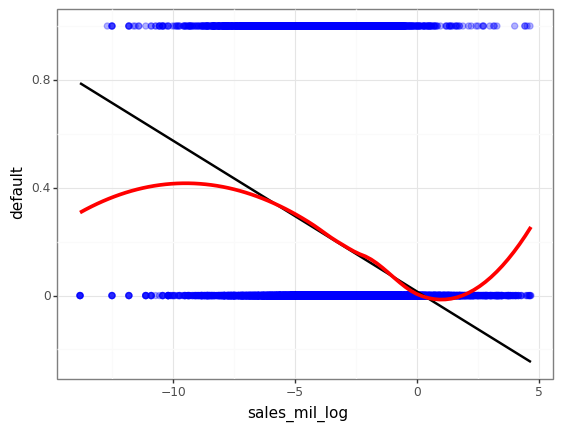

<ggplot: (364078810)>

In [50]:


(
    ggplot(bisnode_sample, aes(x="sales_mil_log", y="default"))
    + geom_point(size=2, alpha=0.3, color="blue")
    + geom_smooth(method="lm", formula="y ~ x**2", color="black", se=False, size=1)
    + geom_smooth(method="loess", se=False, colour="red", size=1.5)
    + labs(x="sales_mil_log", y="default")
    + theme_bw()
)

#### Task
convert default to a factor variable and plot!\
what is the problem? It is a bad idea to convert to a factor?

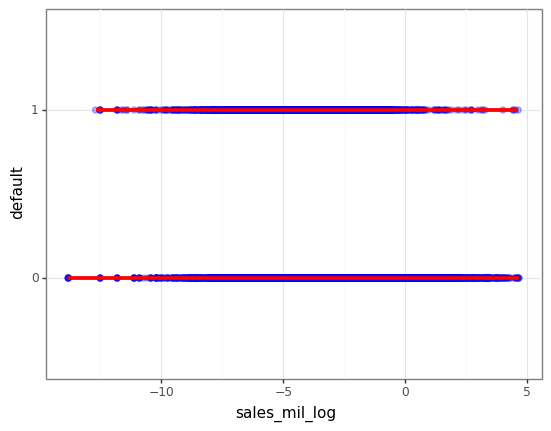

<ggplot: (364043730)>

In [51]:
bisnode_sample["default_factor"] = bisnode_sample["default"].astype("category")

(
    ggplot(bisnode_sample, aes(x="sales_mil_log", y="default_factor"))
    + geom_point(size=2, alpha=0.3, color="blue")
    + geom_smooth(method="lm", formula="y ~ x**2", color="black", se=False, size=1)
    + geom_smooth(method="loess", se=False, colour="red", size=1.5)
    + labs(x="sales_mil_log", y="default")
    + theme_bw()
)

Growth (%) in sales \
Take the lags but make sure only for the same company!

In [52]:
bisnode["d1_sales_mil_log"] = bisnode.groupby("comp_id")["sales_mil_log"].transform(
    lambda x: x - x.shift(1)
)

Repeat random sample to include the new variables

In [53]:
bisnode_sample = bisnode.loc[lambda x: x["comp_id"].isin(comp_id_f)]

 First measure for change in sales: take the sale change in logs

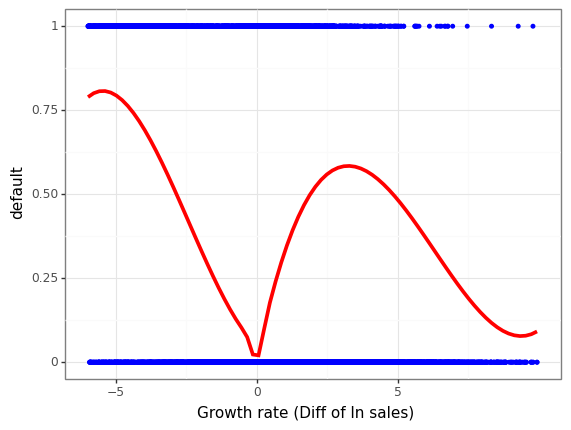

<ggplot: (363251250)>

In [54]:
nw = (
    ggplot(bisnode_sample, aes(x="d1_sales_mil_log", y="default"))
    + geom_point(size=1, fill="blue", color="blue")
    + geom_smooth(method="loess", se=False, colour="red", size=1.5)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + theme_bw()
    + scale_x_continuous(limits=(-6, 10), breaks=np.arange(-5, 10, 5))
)
nw

### Winsorized Data:
  - set (extreme) values to a certain (lower) value

Note: 
    
 winsorizing is the action to set manually a value \
      'censoring' is called if the values are already 'winsorized' \
      thus it is unknown what was the original value, but can only see the set value \
        e.g. mother's wage who are at home is 0, however if she would work this value would be different \
      'truncation' is when we dropping certain values below or above a threshold from the data 

Create new variable and add flag variables for modelling

In [55]:
bisnode["flag_low_d1_sales_mil_log"] = np.where(
    bisnode["d1_sales_mil_log"] < -1.5, 1, 0
)
bisnode["flag_high_d1_sales_mil_log"] = np.where(
    bisnode["d1_sales_mil_log"] > 1.5, 1, 0
)
bisnode["d1_sales_mil_log_mod"] = np.where(
    bisnode["d1_sales_mil_log"] < -1.5,
    -1.5,
    np.where(bisnode["d1_sales_mil_log"] > 1.5, 1.5, bisnode["d1_sales_mil_log"]),
)

Repeat random sample to include the new variables

In [56]:
bisnode_sample = bisnode.loc[lambda x: x["comp_id"].isin(comp_id_f)]

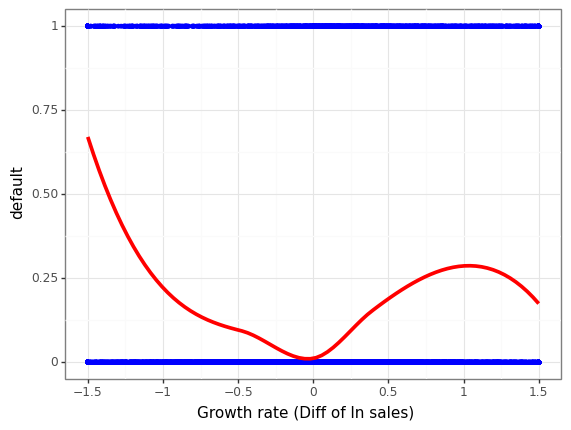

<ggplot: (364262175)>

In [57]:
w = (
    ggplot(bisnode_sample, aes(x="d1_sales_mil_log_mod", y="default"))
    + geom_point(size=1, fill="blue", color="blue")
    + geom_smooth(method="loess", se=False, colour="red", size=1.5)
    + labs(x="Growth rate (Diff of ln sales)", y="default")
    + theme_bw()
    + scale_x_continuous(limits=(-1.5, 1.5), breaks=np.arange(-1.5, 1.51, 0.5))
)
w

#### Task:
Show the effect of winsorizing: transformation of the original data\
put d1_sales_mil_log on x-axis and d1_sales_mil_log_mod to the y-axis

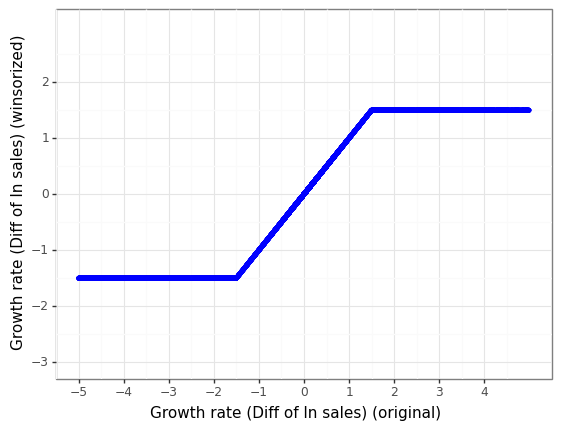

<ggplot: (364149770)>

In [58]:
(
    ggplot(bisnode_sample, aes(x="d1_sales_mil_log", y="d1_sales_mil_log_mod"))
    + geom_point(size=1, fill="blue", color="blue")
    + labs(
        x="Growth rate (Diff of ln sales) (original)",
        y="Growth rate (Diff of ln sales) (winsorized)",
    )
    + theme_bw()
    + scale_x_continuous(limits=(-5, 5), breaks=np.arange(-5, 5, 1))
    + scale_y_continuous(limits=(-3, 3), breaks=np.arange(-3, 3, 1))
)